# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow. 

In [1]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import deque

In [105]:
class Graph:
    def __init__(self, nodes):
        self.graph = [[] for _ in range(nodes)]
    def has_edge(self, src, dst):
        return src in self.graph[dst]
    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)
    def get_graph(self):
        return self.graph
        
    # 1.3
    def has_cycle(self):
        # iterate over all nodes
        g = self.get_graph()
        for node in range(len(g)):
            cycle = self.__has_cycle_helper__(node, node, set())
            if cycle:
                return True
        return False
    def __has_cycle_helper__(self, n1:int, parent:int, visited:set):
        # init visited
        if len(visited) == 0:
            visited.add(n1)

        # get adjacency list
        g = self.get_graph()

        # dfs on all child nodes
        for node in g[n1]:
            # check if we've seen it before, aside from the parent
            if node == parent:
                continue
            if node in visited:
                return True

            visited.add(node)
            has_cycle = self.__has_cycle_helper__(node, n1, visited)
            if has_cycle:
                return True

        return False

    # 1.4
    def is_connected(self):
        g = self.get_graph()
        # only need to check the first half
        for n1 in range(len(g)//2 + 1):
            for n2 in range(len(g)):
                if n1 != n2:
                    connected = self.is_connected_two(n1, n2)
                    if not connected: return False
        return True

    def is_connected_two(self, n1:int, n2:int):
        connection = bfs2(self, n1, n2)
        return connection is not None and len(connection) > 0


# 1.1
def bfs2(graph: Graph, n1: int, n2: int):
    g = graph.get_graph()
    if n1 == n2 or len(g) <= n1:
        return []

    # have we seen this node?
    visited = set()
    visited.add(n1)
    q = deque()
    q.extend(g[n1])
    found = False

    # construct a path for all nodes so we can backtrack to the first node
    # each key is a child and the value is the parent node
    path = {n1: n1}
    for first_children in g[n1]:
        path[first_children] = n1

    while len(q) > 0 and not found:
        # ensure we look at the oldest elements first
        n = q.popleft()

        # run checks
        if n == n2:
            found = True
        if n in visited:
            continue

        # save info of node
        visited.add(n)
        q.extend(g[n])
        for child in g[n]:
            if child not in visited:
                path[child] = n

    if not found:
        return None

    # generate our list path
    path_out = []
    n = n2
    while n != n1:
        path_out.append(n)
        n = path[n]
    path_out.append(n1)
    path_out.reverse()
    return path_out

def dfs2(graph: Graph, n1: int, n2: int, visited:set = set(), path:list = []):
    # handle case where client passes n1=n2
    if n1 == n2:
        return path
    if n1 in visited:
        return None
    # init the path; only run on depth=0
    if path == []:
        path = [n1]
    
    # get adjacency list and visit
    g = graph.get_graph()
    visited.add(n1)

    for node in g[n1]:
        # found node
        if node == n2:
            return path + [n2]
        
        if node not in visited:
            # dfs, if none then n2 was not found
            dfs_res = dfs2(graph, node, n2, visited, path + [node])
            if dfs_res is not None:
                return dfs_res

    # no path found
    return None

# 1.2
# n1 is the optional starting point
def bfs3(graph: Graph, n1:int = 0):
    g = graph.get_graph()
    if len(g) <= n1:
        return {}

    # have we seen this node?
    visited = set()
    visited.add(n1)
    q = deque()
    q.extend(g[n1])

    # construct a path for all nodes so we can backtrack to the first node
    # each key is a child and the value is the parent node
    path = {n1: n1}
    for first_children in g[n1]:
        path[first_children] = n1

    while len(q) > 0:
        # ensure we look at the oldest elements first
        n = q.popleft()

        # run check
        if n in visited:
            continue

        # save info of node
        visited.add(n)
        q.extend(g[n])
        for child in g[n]:
            if child not in visited:
                path[child] = n

    return path

def dfs3(graph: Graph, n1:int = 0, visited:dict = dict()):
    # init visited
    if len(visited) == 0:
        visited[n1] = n1

    # get adjacency list
    g = graph.get_graph()

    # dfs on all child nodes
    for node in g[n1]:
        # visit node and keep track of parent
        if node not in visited:
            visited[node] = n1
            dfs3(graph, node, visited)

    return visited

# 1.5
def create_random_graph(n, num_edges):
    g = Graph(n)

    # clean input, any more edges and we'd have repeats
    max_edges = (n*(n-1))/2
    adjusted_edges = int(min(num_edges, max_edges))

    for _ in range(adjusted_edges):
        while True:
            start = random.randint(0, n-1)
            end = random.randint(0, n-1)

            if start == end or g.has_edge(start, end):
                continue
            g.add_edge(start, end)
            break

    return g

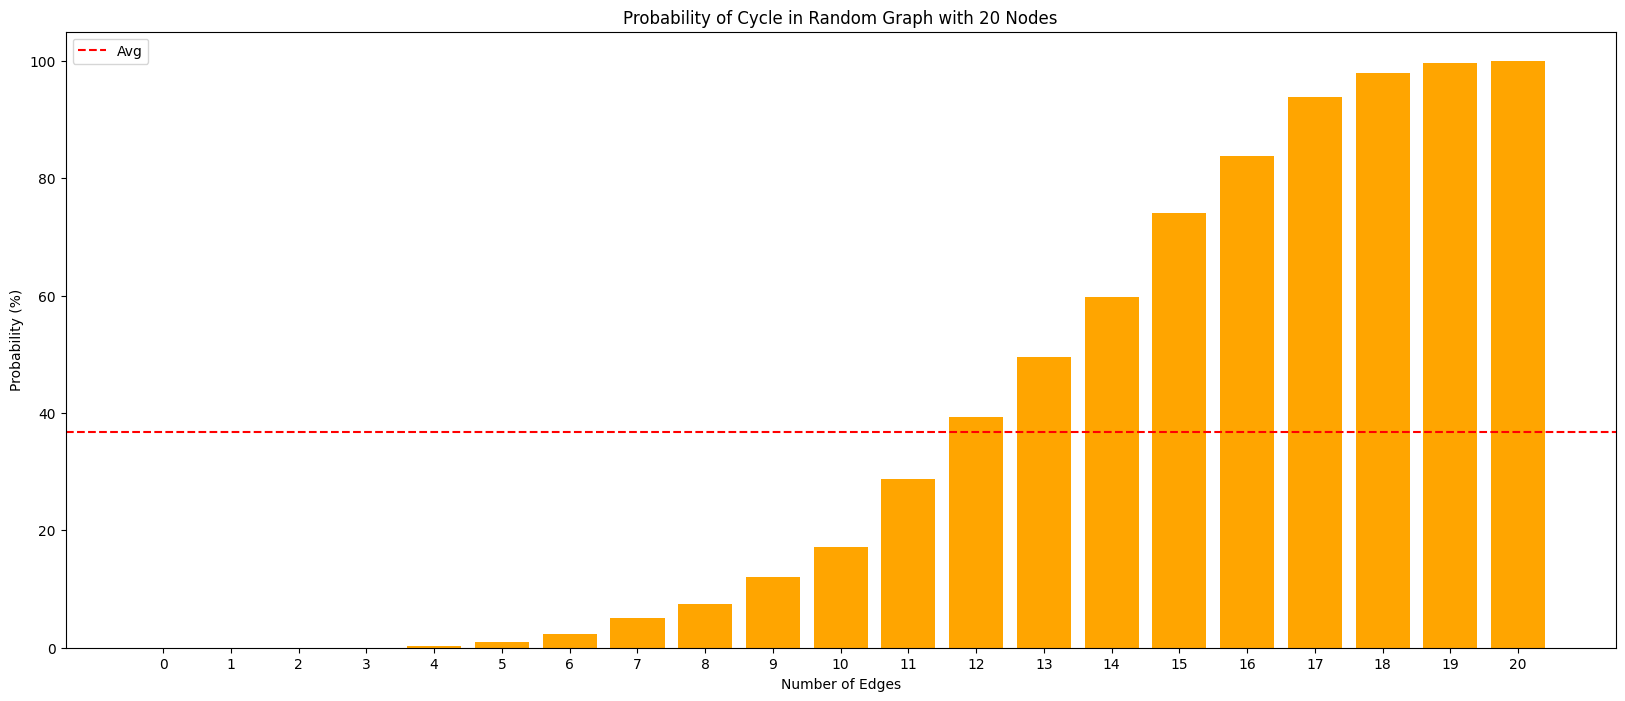

In [93]:
# 1.6

nodes = 20
iterations_per_edge = 1000
probabilities = []

for i in range(0, nodes+1):
    total = 0
    # check x iterations if this graph has a cycle
    for _ in range(iterations_per_edge):
        g = create_random_graph(nodes, i)
        if g.has_cycle():
            total += 0.1
    probabilities += [round(total, 2)]

x_axis = np.arange(0, len(probabilities), 1)
plt.figure(figsize=(20, 8))
plt.bar(x_axis, probabilities, color='orange')
plt.axhline(np.mean(probabilities), color="red", linestyle="--", label="Avg")
plt.xticks(x_axis, x_axis)
plt.title("Probability of Cycle in Random Graph with " + str(nodes) + " Nodes")
plt.ylabel("Probability (%)")
plt.xlabel("Number of Edges")
plt.legend()
plt.show()

**Reflection**:
We decided on using 20 nodes to compute this as it's a high enough number to see a variable change of edges, while not being too computationally expensive. For every node we run 1000 iterations to accurately compute the probability of that specific number of edges having a cycle. There is no need to check when the number of edges > number of nodes as we will be guaranteed to find a cycle. It seems that we break the 50% chance of having a cycle when we have about 66% amount of edges to nodes.

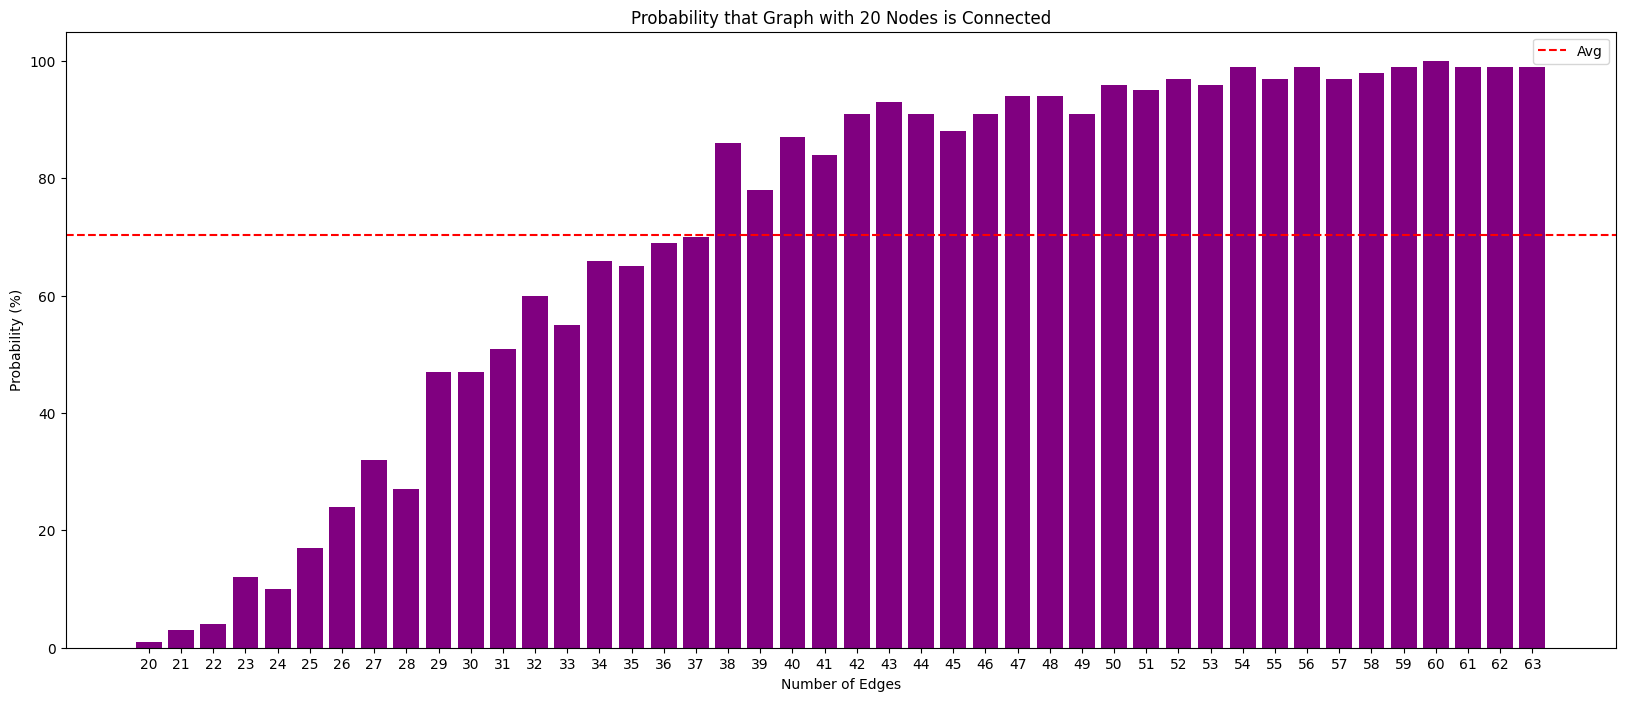

In [108]:
# 1.7

nodes = 20
iterations_per_edge = 100
probabilities = []

for i in range(nodes, 190):
    total = 0
    # check x iterations if this number of edges is connected
    for _ in range(iterations_per_edge):
        g = create_random_graph(nodes, i)
        if g.is_connected():
            total += 1
    probabilities += [round(total, 2)]
    # if the last 5 runs have on average > 99%
    if (len(probabilities) > 10 and (sum(probabilities[-5:])/5 > 99)):
        break

x_axis = np.arange(nodes, len(probabilities) + nodes, 1)
plt.figure(figsize=(20, 8))
plt.bar(x_axis, probabilities, color='purple')
plt.axhline(np.mean(probabilities), color="red", linestyle="--", label="Avg")
plt.xticks(x_axis, x_axis)
plt.title("Probability that Graph with " + str(nodes) + " Nodes is Connected")
plt.ylabel("Probability (%)")
plt.xlabel("Number of Edges")
plt.legend()
plt.show()

**Reflection**:
Once again we chose to run this experiment on 20 nodes. This time, we must start our edge iteration at the number of nodes, as you cannot have a connected graph when the number of edges is less than the number of nodes. Computing whether two vertices are connected is much more computationally expensive so we've lowered the iterations per edge from 1000 to 100. In our graph code we've also optimized the connected function to ensure we're not running unneeded checks. The chance of being connected starts off incredibly low and not until we have about 2-3x as many edges as nodes do we see a high chance of having a connected graph.

In [ ]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G : Graph, C):
    graph = G.get_graph()
    for start in range(0,len(graph)):
        for end in graph[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = [i for i in range(len(G.get_graph()))]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover